In [1]:
import pandas as pd

In [2]:
def load_data():
    df = pd.read_csv("./data/loan_small.csv")
    df.head()
    return df

df = load_data()
df.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
0,LP001002,NaN,5849.0,0.0,NaN,urban,Y
1,LP001003,Male,4583.0,NaN,128.0,semi,N
2,LP001005,Male,3000.0,0.0,66.0,NaN,Y
3,LP001006,Female,2583.0,2358.0,120.0,semi,NaN
4,LP001008,Male,NaN,0.0,141.0,urban,Y


In [3]:
df.describe(), df.columns, df.dtypes

(       ApplicantIncome  CoapplicantIncome  LoanAmount
 count        14.000000          15.000000   13.000000
 mean       4103.571429        2509.333333  140.923077
 std        2858.096481        3147.982090   86.032418
 min        1299.000000           0.000000   17.000000
 25%        2520.750000         350.000000  109.000000
 50%        3118.000000        1526.000000  125.000000
 75%        4858.250000        2672.000000  158.000000
 max       12841.000000       10968.000000  349.000000,
 Index(['Loan_ID', 'Gender', 'ApplicantIncome', 'CoapplicantIncome',
        'LoanAmount', 'Area', 'Loan_Status'],
       dtype='object'),
 Loan_ID               object
 Gender                object
 ApplicantIncome      float64
 CoapplicantIncome    float64
 LoanAmount           float64
 Area                  object
 Loan_Status           object
 dtype: object)

### Handling missing values

In [4]:
# Check for missing values
df.isnull().sum(axis=0)

Loan_ID              0
Gender               1
ApplicantIncome      2
CoapplicantIncome    1
LoanAmount           3
Area                 1
Loan_Status          1
dtype: int64

In [5]:
# Drop the missing values
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Area                 0
Loan_Status          0
dtype: int64

In [6]:
# Replace missing categorical variables with mode (most common values)
df = load_data()
cols = ["Gender","Area","Loan_Status"]
df[cols] = df[cols].fillna(value=df[cols].mode().iloc[0]) # .iloc[0] gets the most frequent value
df.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
0,LP001002,Male,5849.0,0.0,NaN,urban,Y
1,LP001003,Male,4583.0,NaN,128.0,semi,N
2,LP001005,Male,3000.0,0.0,66.0,semi,Y
3,LP001006,Female,2583.0,2358.0,120.0,semi,Y
4,LP001008,Male,NaN,0.0,141.0,urban,Y


In [7]:
# Replace numerical values with mean
cols_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]
df[cols_num] = df[cols_num].fillna(value=df[cols_num].mean())
df.head()

,Loan_ID,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Area,Loan_Status
0,LP001002,Male,5849.000000,0.000000,140.923077,urban,Y
1,LP001003,Male,4583.000000,2509.333333,128.000000,semi,N
2,LP001005,Male,3000.000000,0.000000,66.000000,semi,Y
3,LP001006,Female,2583.000000,2358.000000,120.000000,semi,Y
4,LP001008,Male,4103.571429,0.000000,141.000000,urban,Y


### Label encoding for categorical data
<ul>
    <li> Get rid of the english labels with a numerical value </li>
    <li>For example, "low", "med", "hi" -> 0,1,2</li>
    <li>Problem with label encoding is that the numbers have certain weightage behind it. For example, 2>1>0, which can potentially affect the model weights.</li>
</ul>

In [8]:
# Check the data types
df.dtypes

Loan_ID               object
Gender                object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Area                  object
Loan_Status           object
dtype: object

In [9]:
df[cols] = df[cols].astype("category") # convert object type to cat type
df.dtypes

Loan_ID                object
Gender               category
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Area                 category
Loan_Status          category
dtype: object

In [10]:
# Convert categorical variables to numerical vals
for col in cols:
    df[col] = df[col].cat.codes

#### Hot encoding / Dummy Variable creation
<ul>
    <li>Convert a categorical column into a matrix of ones and zeros </li>
    <li>If column has 3 categories and n rows, we get a matrix of n x 3 of zeros and ones</li>
</ul>

In [11]:
df = load_data()
df2 = df.drop(["Loan_ID"], axis=1)
df2 = pd.get_dummies(df2) # Take the dataset and convert the object type cols into dummy vars

In [12]:
df2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Area_rural,Area_semi,Area_urban,Loan_Status_N,Loan_Status_Y
0,5849.0,0.0,NaN,0,0,0,0,1,0,1
1,4583.0,NaN,128.0,0,1,0,1,0,1,0
2,3000.0,0.0,66.0,0,1,0,0,0,0,1
3,2583.0,2358.0,120.0,1,0,0,1,0,0,0
4,NaN,0.0,141.0,0,1,0,0,1,0,1


### Data Normalization

Normalizing data = adjusting the values measured on different scales to a common scale. <br>

We normalize the data because values that are not normalized will have different effects on the model weight. For example, in a linear regression, say we have years of experience and salary (measured in thousands). If not normalized, the salary will have a bigger influence over the model. This is because even a small change in the weight for the salary will have a large effect on the dependent variable. <br>

After normalization, values will lie between 0 to 1 or -1 to 1, for Z-score normalization, and 0 to 1 for min-max normalization. <b>Note that for Z-score normalization, outliers will have values above 1 or below -1.</b> <br>

<ul>
    <li><b> Normalization/Standardization does not change the distribution of the data. It's only purpose is to make the features on the same value scale.</b></li>
    <li>To test for data distribution normality, we can use the Shapiro test</li>
    <li><b>To change the shape of the data, we can use the logarithmic transformation</b></li>
</ul>

<b> Z-Score Normalization</b>

<ul>
    <li>x - mean / stdev</li>
    <li>Assumes data is normally distributed and will scale them to zero mean and 1 std dev.</li>
    <li>Retains information about your outliers in the data</li>
    <li>We use this scaler if we know the dist is normal</li>
</ul>

<b> Min-Max Normalization </b>

<ul>
    <li>x - min /(max-min)</li>
    <li>Used when the upper and lower boundaries are well known for domain knowledge, for example, 0 to 255 in color range, because we know that we will not get any outliers</li>
</ul>

<h4>If features are correlated, we do not scale them as it would damage the correlation</h4>
<br>
<div>
    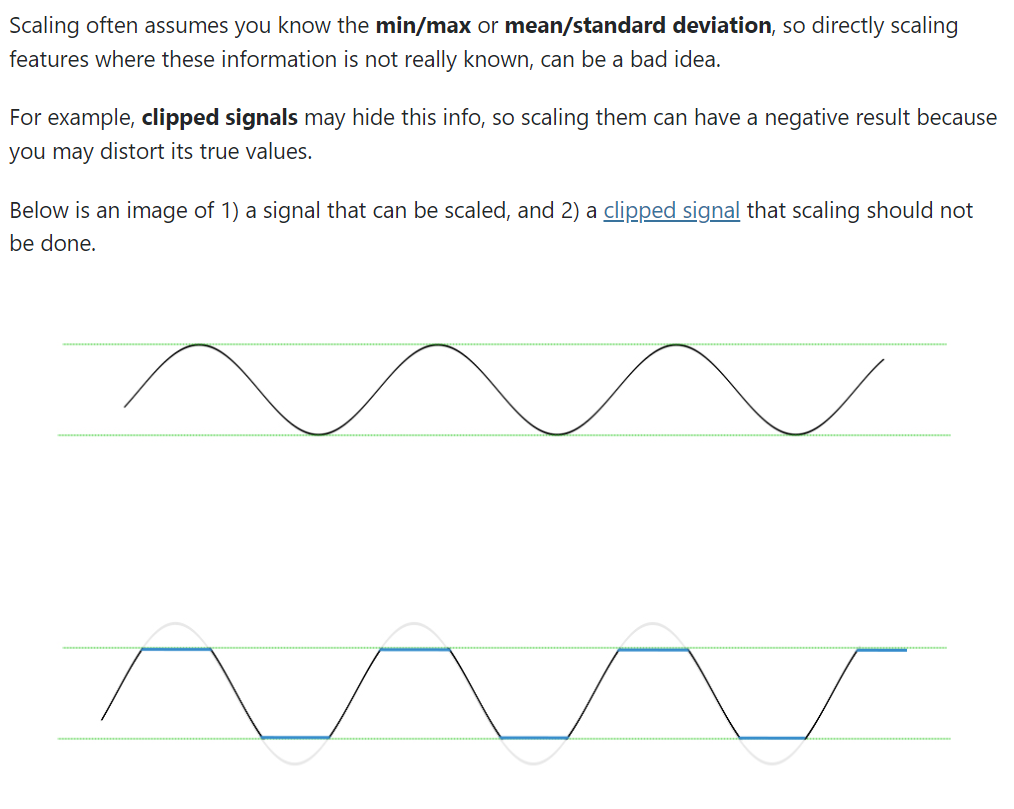
</div>

In [13]:
df = load_data()

df.dtypes

Loan_ID               object
Gender                object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Area                  object
Loan_Status           object
dtype: object

In [14]:
df_num = df.iloc[:, 2:5]
# Fill missing values with mean
cols_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]
df_num[cols_num] = df_num[cols_num].fillna(value=df_num[cols_num].mean())

# Z-Score normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df_num)

### For train-test data, we always scale on train and blindly apply to test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

array([[ 6.77506570e-01, -8.52161828e-01,  3.81467405e-16],
       [ 1.86095273e-01,  0.00000000e+00, -1.73449547e-01],
       [-4.28362928e-01, -8.52161828e-01, -1.00559440e+00],
       [-5.90225890e-01, -5.13923313e-02, -2.80823076e-01],
       [ 0.00000000e+00, -8.52161828e-01,  1.03243778e-03],
       [ 5.09821198e-01,  5.72786776e-01,  1.69216552e+00],
       [-6.87266036e-01, -3.37332923e-01,  3.81467405e-16],
       [-4.14389147e-01, -1.81118348e-03,  2.29201187e-01],
       [-3.78733825e-02, -3.33936954e-01,  3.63418098e-01],
       [ 3.39152536e+00,  2.87253700e+00,  2.79274419e+00],
       [-3.50730811e-01, -6.14443996e-01, -9.51907631e-01],
       [-6.22443218e-01, -2.27303527e-01, -4.28461678e-01],
       [ 0.00000000e+00,  1.90061067e+00,  3.81467405e-16],
       [-8.73583115e-01,  1.12293376e-01, -3.61353222e-01],
       [-1.08862408e+00, -4.83359592e-01, -1.66325726e+00],
       [ 3.28550207e-01, -8.52161828e-01, -2.13714620e-01]])

In [15]:
# Min-max normalization
df_num = df.iloc[:, 2:5]
# Fill missing values with mean
cols_num = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]
df_num[cols_num] = df_num[cols_num].fillna(value=df_num[cols_num].mean())

from sklearn.preprocessing import minmax_scale
min_max_scaler = minmax_scale(df_num)

In [16]:
min_max_scaler

array([[0.39421244, 0.        , 0.37326228],
       [0.28452608, 0.22878677, 0.33433735],
       [0.14737481, 0.        , 0.14759036],
       [0.11124588, 0.21498906, 0.31024096],
       [0.24298834, 0.        , 0.37349398],
       [0.35678392, 0.38256747, 0.75301205],
       [0.08958586, 0.13822028, 0.37326228],
       [0.15049385, 0.22830051, 0.4246988 ],
       [0.23453474, 0.13913202, 0.45481928],
       [1.        , 1.        , 1.        ],
       [0.16470282, 0.06382203, 0.15963855],
       [0.10405476, 0.16776076, 0.27710843],
       [0.24298834, 0.73905908, 0.37326228],
       [0.04799861, 0.25893508, 0.29216867],
       [0.        , 0.09901532, 0.        ],
       [0.31632299, 0.        , 0.3253012 ]])